In [1]:
#Speed Up autocomplete
%config Completer.use_jedi = False
#can use ipython locate profile to find your current profile directory, and edit the ipython_config.py to add c.IPCompleter.use_jedi = False

In [161]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


In [183]:
#load the data
data = pd.read_csv('data/train.csv')

In [251]:
#data dictionary 
ddict = open('data/data_description.txt', 'r')
print(ddict.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [185]:
pd.set_option('display.max_rows', 100)
data.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
Id,1,2,3,4,5,6,7,8,9,10,11,12
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


### Observe: 

- ID columns is not discriminative (drop it)
- SalePrice is target variable

***

In [180]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [181]:
len(data.columns)

80

### Observe: 

- 81 Features

***

In [265]:
sorted(list(data.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Observe: 

- Lots of missing values

***

In [206]:
#Drop ID column
data = pd.read_csv('data/train.csv')  
data.drop(columns=['Id'], inplace=True)
#data.columns

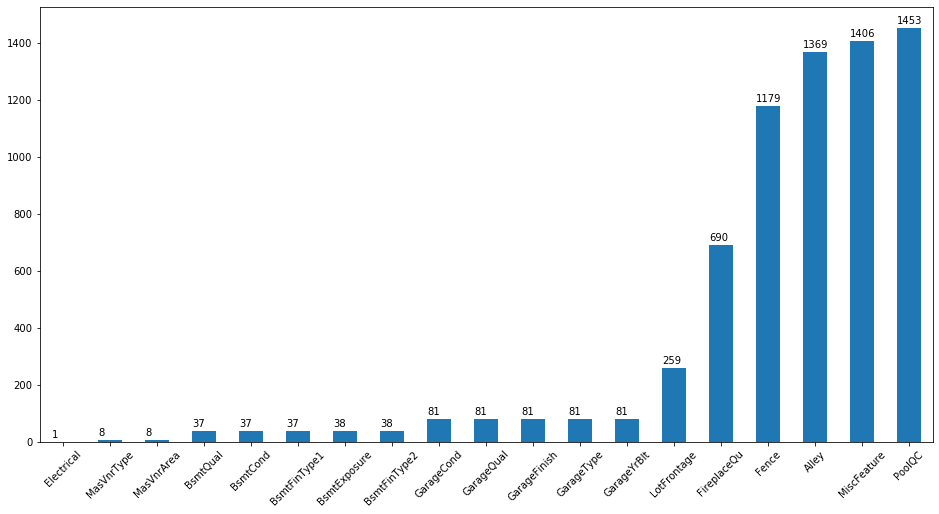

In [169]:
#get all the columns with missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

# plot the columns with missing values
ax = missing.plot(kind='bar', figsize=(16,8), rot=45)

# show values at top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c264522e8>,
      dtype=object)

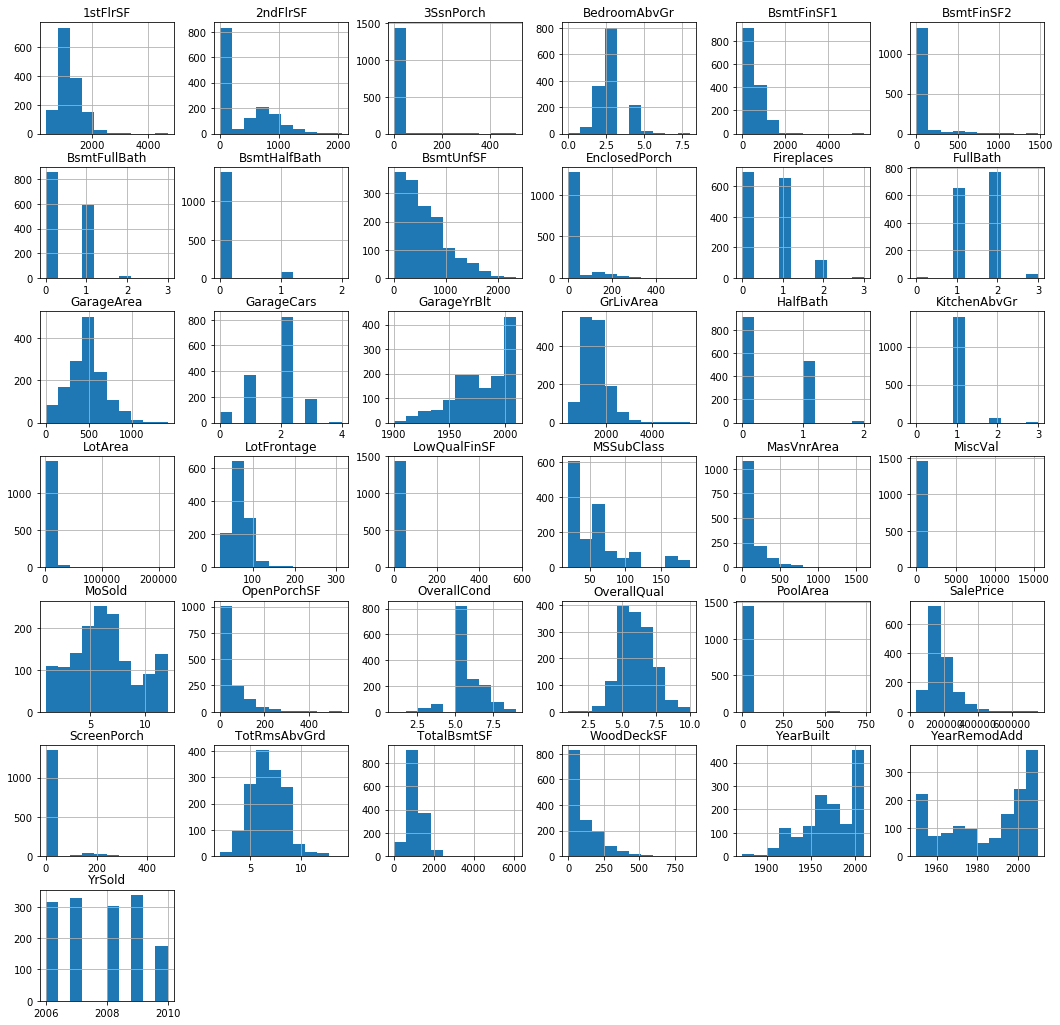

In [208]:
#Quick look at the numeric distributions
data[data.describe().columns[:]].hist(figsize=(18,18))

In [239]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [250]:
tmp_df = data[['BedroomAbvGr', 'YrSold', 'SalePrice']]

for year in np.sort(tmp_df['YrSold'].unique()):
    print(year)
    yr_df = tmp_df[tmp_df['YrSold'] == year]
    print(yr_df[['BedroomAbvGr', 'SalePrice']].groupby(['BedroomAbvGr']).mean())

2006
                  SalePrice
BedroomAbvGr               
0             265000.000000
1             174852.444444
2             159506.952381
3             178990.125000
4             231626.549020
5             177414.285714
6             125000.000000
2007
                  SalePrice
BedroomAbvGr               
1             115233.333333
2             160056.440000
3             183882.552632
4             249109.180000
5             133200.000000
6             130000.000000
8             200000.000000
2008
                  SalePrice
BedroomAbvGr               
0             197479.500000
1             192966.166667
2             161963.946667
3             178750.837500
4             189906.117647
5             248000.000000
6             139250.000000
2009
                  SalePrice
BedroomAbvGr               
1             164640.166667
2             155391.741176
3             184815.605128
4             218153.941176
5             169250.000000
6             171476.500000


### Quick look at some of the typical feratures used on Real Estate sites

In [253]:
df = data[['BedroomAbvGr', 'SalePrice']].groupby(['BedroomAbvGr']).mean()
df

#df.plot(kind='bar', figsize=(18,12), rot = 0)

,SalePrice
BedroomAbvGr,
0,221493.166667
1,173162.420000
2,158197.659218
3,181056.870647
4,220421.253521
5,180819.047619
6,143779.000000
8,200000.000000


In [211]:
data[['YrSold', 'SalePrice']].groupby(['YrSold']).mean()

,SalePrice
YrSold,
2006,182549.458599
2007,186063.151976
2008,177360.838816
2009,179432.103550
2010,177393.674286


In [171]:
#Data Processing
from sklearn.model_selection import train_test_split

In [175]:
set(list(data.describe().columns))

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [200]:
# Drop columns with missing values and non-numeric columns for a quick and dirty regression
# data.dropna(axis = 1)
data_temp = data[set(list(data.describe().columns)) - set(list(missing.index))]
data_temp.columns

Index(['ScreenPorch', 'KitchenAbvGr', 'Fireplaces', 'MoSold', 'LotArea',
       '3SsnPorch', 'OverallCond', 'BsmtUnfSF', 'FullBath', 'BsmtFinSF2',
       '1stFlrSF', 'OpenPorchSF', 'HalfBath', 'MiscVal', 'BedroomAbvGr',
       'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'PoolArea', 'GarageArea',
       'YearBuilt', 'BsmtHalfBath', 'GrLivArea', 'YrSold', 'BsmtFullBath',
       'LowQualFinSF', 'GarageCars', '2ndFlrSF', 'MSSubClass', 'EnclosedPorch',
       'YearRemodAdd', 'TotalBsmtSF', 'TotRmsAbvGrd', 'OverallQual'],
      dtype='object')

In [201]:
X = data_temp[data_temp.columns[:-1]]
y = data_temp[data_temp.columns[-1:]]

#train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [202]:
# statsmodel intro video https://youtu.be/V86gTgL1FRw

import statsmodels.api as sm

#Using Stats model run a Linear Regression

X2 = sm.add_constant(X_train.values)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallQual   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     98.70
Date:                Sat, 04 Jan 2020   Prob (F-statistic):          1.61e-296
Time:                        12:53:25   Log-Likelihood:                -1259.3
No. Observations:                1168   AIC:                             2583.
Df Residuals:                    1136   BIC:                             2745.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.1086     32.626     -1.076      0.2

In [ ]:
est2.